## Simple Neural Network
Here we will build a neural network to solve a regression problem . We will simulate data with one continuous input variable X and one continuous output Y, and we will build a network to predict Y based on X. We will choose the model which gives highest accuracy after tuning the hyper-parameters.

In [31]:
# importing libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 49.9823 - val_loss: 65.2340
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 50.0189 - val_loss: 64.5389
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 49.9628 - val_loss: 63.8408
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 47.6912 - val_loss: 63.1390
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 49.9082 - val_loss: 62.4330
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 48.3484 - val_loss: 61.7285
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 47.9809 - val_loss: 61.0198
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 47.0599 - val_loss: 60.3074
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 47.1269 - val_loss: 59.5894
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 46.7851 - val_loss: 58.8693
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 45.7643 - val_loss: 58.1473
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step -

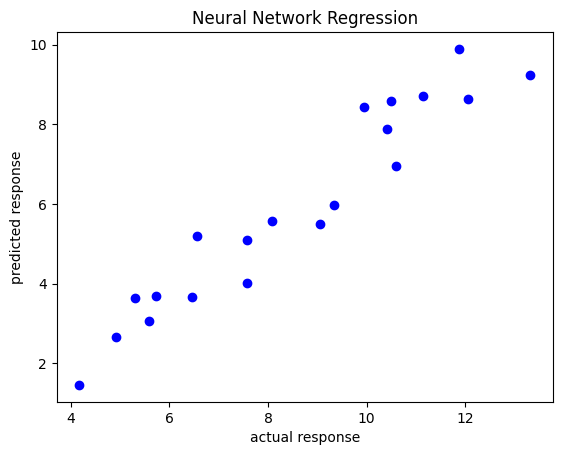

In [32]:
# generating data
def create_data(N, w):
  X = np.random.rand(N, 1) * 5
  y = w[0] + w[1] * X + np.random.randn(N, 1) # Y = a + b * X + e
  return X,y

X, y = create_data(100, (3, 2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Neural network with 1 hidden layer with 'relu' activation function
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

X_new, y_new = create_data(20, (3, 2))
y_pred = model.predict(X_new)
explained_variance_ratio = 1- np.var(y_pred - y_new)/np.var(y_new)
print(f"Explained variance ratio in tests: {explained_variance_ratio}")

# Plotting the actual response vs predicted response
plt.scatter(y_new, y_pred, color='blue')
plt.xlabel('actual response')
plt.ylabel('predicted response')
plt.title('Neural Network Regression')
plt.show()